In [ ]:
import torch
import torchvision
import random 
import matplotlib.pyplot as plt
import numpy as np
import torchvision.datasets as datasets  # Standard datasets
from skimage import io

alexnet = torchvision.models.AlexNet()
alexnet

In [ ]:
train = datasets.FashionMNIST(root = "FashionMNIST/processed/training.pt", train = True, download = True)
test  = datasets.FashionMNIST(root = "FashionMNIST/processed/test.pt", train = False,  download = True)
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

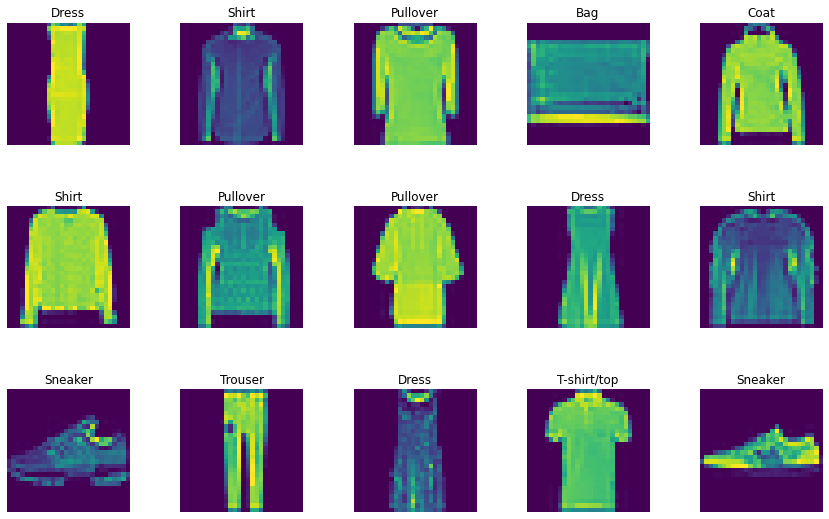

In [ ]:
r, c = 3, 5
plt.figure(figsize=(c*3, r*3))
for row in range(r):
    for col in range(c):
        index = c*row + col
        plt.subplot(r, c, index + 1)
        ix = random.randint(0, len(train)-1)
        img, label = train[ix]
        plt.imshow(img)
        plt.axis('off')
        plt.title(classes[label])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_imgs, train_labels = train_test_split(train.data/255, train.targets/255, test_size=0.2, stratify=test)
test_imgs, test_labels = train_test_split(test.data/255, test.targets/255, test_size=0.2, stratify=test)

len(train_imgs), len(test_imgs)

TypeError: ignored

In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y, trans, device):
    self.X = X
    self.y = y
    self.trans = trans
    self.device = device

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    # cargar la imágen
    img = io.imread(self.X[ix])
    # aplicar transformaciones
    if self.trans:
      img = self.trans(image=img)["image"]
    return torch.from_numpy(img / 255.).float().permute(2,0,1), torch.tensor(self.y[ix])

In [ ]:
import albumentations as A
device = "cuda" if torch.cuda.is_available() else "cpu"
trans = A.Compose([
    A.Resize(224, 224)
])

dataset = {
    'train': Dataset(train.data,  train.targets, trans, device), 
    'test': Dataset(test.data,  test.targets, trans, device)
}

len(dataset['train']), len(dataset['test'])

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(10,6))
for _ax in axs:
  for ax in _ax:
    ix = random.randint(0, len(dataset['train'])-1)
    img, lab = dataset['train'][ix]
    ax.imshow(img.permute(1,2,0))
    ax.axis('off')
    ax.set_title(classes[lab])
plt.show()

In [ ]:
dataloader = {
    'train': torch.utils.data.DataLoader(dataset['train'], batch_size=64, shuffle=True, pin_memory=True), 
    'test': torch.utils.data.DataLoader(dataset['test'], batch_size=256, shuffle=False)
}

imgs, labels = next(iter(dataloader['train']))
imgs.shape